<a href="https://colab.research.google.com/github/Limyoonseo/230906/blob/main/202113324_%EC%9E%84%EC%9C%A4%EC%84%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***(2021.09-2023.08) 제주지역 유형별 소비 데이터 분석***

> 컴퓨터공학과 202113324 임윤서



In [164]:
# Google Drive를 마운트하는 작업
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1. 데이터 준비**

In [165]:
#관련 라이브러리 준비
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

#file_path변수에 데이터 파일경로 저장
file_path = '/content/drive/MyDrive/final_jeju.csv'
#데이터프레임으로 변환
df = pd.read_csv(file_path,encoding= 'euc_kr')
df

,City,Urban,Town,Tourism,Sex,Age,Residence,21.09~22.08 Amount,21.09~22.08 Count,22.09~23.08 Amount,22.09~23.08 Count
0,NaN,NaN,NaN,Transport,M,Below 20,Jeju,19650725,479,29843198,851
1,NaN,NaN,NaN,Transport,M,20s,Jeju,2089069468,56192,2711132135,73278
2,NaN,NaN,NaN,Transport,M,30s,Jeju,10164021228,205373,10459317336,220460
3,NaN,NaN,NaN,Transport,M,40s,Jeju,22623678695,367138,20797744658,368599
4,NaN,NaN,NaN,Transport,M,50s,Jeju,24392770471,361576,20730544586,358093
...,...,...,...,...,...,...,...,...,...,...,...
6105,Seogwipo,Urban,Hyodon,Food,W,20s,Others,74464420,4275,111280350,7253
6106,Seogwipo,Urban,Hyodon,Food,W,30s,Others,124836280,6520,158482940,8834
6107,Seogwipo,Urban,Hyodon,Food,W,40s,Others,70466940,3003,96188880,4340
6108,Seogwipo,Urban,Hyodon,Food,W,50s,Others,41606210,1593,52633750,2177


In [166]:
#데이터 백업
copy= df.copy()
#데이터프레임을 csv파일로 저장
df.to_csv('/content/drive/MyDrive/final_jeju_copy.csv', index=False)
#저장된 파일 확인
path= '/content/drive/MyDrive/final_jeju_copy.csv'
copy= pd.read_csv(path)
copy

,City,Urban,Town,Tourism,Sex,Age,Residence,21.09~22.08 Amount,21.09~22.08 Count,22.09~23.08 Amount,22.09~23.08 Count
0,NaN,NaN,NaN,Transport,M,Below 20,Jeju,19650725,479,29843198,851
1,NaN,NaN,NaN,Transport,M,20s,Jeju,2089069468,56192,2711132135,73278
2,NaN,NaN,NaN,Transport,M,30s,Jeju,10164021228,205373,10459317336,220460
3,NaN,NaN,NaN,Transport,M,40s,Jeju,22623678695,367138,20797744658,368599
4,NaN,NaN,NaN,Transport,M,50s,Jeju,24392770471,361576,20730544586,358093
...,...,...,...,...,...,...,...,...,...,...,...
6105,Seogwipo,Urban,Hyodon,Food,W,20s,Others,74464420,4275,111280350,7253
6106,Seogwipo,Urban,Hyodon,Food,W,30s,Others,124836280,6520,158482940,8834
6107,Seogwipo,Urban,Hyodon,Food,W,40s,Others,70466940,3003,96188880,4340
6108,Seogwipo,Urban,Hyodon,Food,W,50s,Others,41606210,1593,52633750,2177


In [167]:
## 변수 설명 ##
#City: 지역구분_시
#Urban: 지역구분_도심/도심외
#Town: 지역구분_읍/면/동
#Tourism: 관광업종 구분
#Sex: 성별
#Age: 나이
#Residence: 거주지
#(기간~기간) Amount: (기간~기간)결제금액
#(기간~기간) Count: (기간~기간)결제횟수

## **2. 데이터 보기**

In [168]:
#기본 정보 출력
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6110 entries, 0 to 6109
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   City                5944 non-null   object
 1   Urban               5944 non-null   object
 2   Town                5622 non-null   object
 3   Tourism             6110 non-null   object
 4   Sex                 6110 non-null   object
 5   Age                 6110 non-null   object
 6   Residence           6110 non-null   object
 7   21.09~22.08 Amount  6110 non-null   int64 
 8   21.09~22.08 Count   6110 non-null   int64 
 9   22.09~23.08 Amount  6110 non-null   int64 
 10  22.09~23.08 Count   6110 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 525.2+ KB


In [169]:
#기초 통계 확인
df.describe()

,21.09~22.08 Amount,21.09~22.08 Count,22.09~23.08 Amount,22.09~23.08 Count
count,6.110000e+03,6.110000e+03,6.110000e+03,6.110000e+03
mean,5.589171e+08,1.456919e+04,6.329647e+08,1.758666e+04
std,2.291066e+09,7.184378e+04,2.558834e+09,8.644572e+04
min,3.050000e+04,1.000000e+01,1.141000e+05,1.000000e+01
25%,1.283825e+07,2.870000e+02,1.671780e+07,3.832500e+02
50%,6.178999e+07,1.545000e+03,7.454642e+07,1.942500e+03
75%,2.470611e+08,5.981500e+03,2.906852e+08,7.602000e+03
max,4.182234e+10,1.594808e+06,4.667898e+10,1.955344e+06


In [170]:
#데이터 유형 확인
df.dtypes

City                  object
Urban                 object
Town                  object
Tourism               object
Sex                   object
Age                   object
Residence             object
21.09~22.08 Amount     int64
21.09~22.08 Count      int64
22.09~23.08 Amount     int64
22.09~23.08 Count      int64
dtype: object

In [171]:
#행 인덱스 확인
df.loc[0]

City                        NaN
Urban                       NaN
Town                        NaN
Tourism               Transport
Sex                           M
Age                    Below 20
Residence                  Jeju
21.09~22.08 Amount     19650725
21.09~22.08 Count           479
22.09~23.08 Amount     29843198
22.09~23.08 Count           851
Name: 0, dtype: object

In [172]:
#상위 3개 데이터 추출
df.head(3)

,City,Urban,Town,Tourism,Sex,Age,Residence,21.09~22.08 Amount,21.09~22.08 Count,22.09~23.08 Amount,22.09~23.08 Count
0,NaN,NaN,NaN,Transport,M,Below 20,Jeju,19650725,479,29843198,851
1,NaN,NaN,NaN,Transport,M,20s,Jeju,2089069468,56192,2711132135,73278
2,NaN,NaN,NaN,Transport,M,30s,Jeju,10164021228,205373,10459317336,220460


In [173]:
#하위 3개 데이터 추출
df.tail(3)

,City,Urban,Town,Tourism,Sex,Age,Residence,21.09~22.08 Amount,21.09~22.08 Count,22.09~23.08 Amount,22.09~23.08 Count
6107,Seogwipo,Urban,Hyodon,Food,W,40s,Others,70466940,3003,96188880,4340
6108,Seogwipo,Urban,Hyodon,Food,W,50s,Others,41606210,1593,52633750,2177
6109,Seogwipo,Urban,Hyodon,Food,W,Over 60,Others,16031700,556,19697950,759


In [174]:
#인덱스 보기
df.index

RangeIndex(start=0, stop=6110, step=1)

In [175]:
#행,열 구조 보기
df.values

array([[nan, nan, nan, ..., 479, 29843198, 851],
       [nan, nan, nan, ..., 56192, 2711132135, 73278],
       [nan, nan, nan, ..., 205373, 10459317336, 220460],
       ...,
       ['Seogwipo', 'Urban', 'Hyodon', ..., 3003, 96188880, 4340],
       ['Seogwipo', 'Urban', 'Hyodon', ..., 1593, 52633750, 2177],
       ['Seogwipo', 'Urban', 'Hyodon', ..., 556, 19697950, 759]],
      dtype=object)

In [176]:
#2021.09 ~ 2022.08기간 동안의 결제금액을 기준으로 오름차순 정렬
df.sort_values(by=['21.09~22.08 Amount'],axis=0)

,City,Urban,Town,Tourism,Sex,Age,Residence,21.09~22.08 Amount,21.09~22.08 Count,22.09~23.08 Amount,22.09~23.08 Count
705,Jeju,Others,Gujwa,Culture/Reservation,M,Below 20,Others,30500,15,316000,31
4925,Jeju,Others,Jocheon,Culture/Reservation,M,Below 20,Others,47500,13,274000,54
4383,Jeju,Urban,Iho,Culture/Reservation,W,20s,Others,73600,14,253000,27
4662,Jeju,Urban,Ildo 2(i),Shopping,M,Below 20,Others,89000,22,412900,71
4275,Jeju,Urban,Ido 2(i),Shopping,M,Below 20,Others,94980,28,358500,106
...,...,...,...,...,...,...,...,...,...,...,...
40,NaN,NaN,NaN,Shopping,M,50s,Jeju,31104310637,1074737,33631164068,1246238
64,NaN,NaN,NaN,Food,M,50s,Jeju,34107818398,867149,37150796017,956366
39,NaN,NaN,NaN,Shopping,M,40s,Jeju,38335812226,1594808,43869790668,1955344
45,NaN,NaN,NaN,Shopping,W,40s,Jeju,38819980576,1313687,42785511472,1522556


In [177]:
#2022.09 ~ 20223.08기간 동안의 결제횟수를 기준으로 내림차순 정렬
df.sort_values(by=['21.09~22.08 Count'], axis=0, ascending=False)

,City,Urban,Town,Tourism,Sex,Age,Residence,21.09~22.08 Amount,21.09~22.08 Count,22.09~23.08 Amount,22.09~23.08 Count
39,NaN,NaN,NaN,Shopping,M,40s,Jeju,38335812226,1594808,43869790668,1955344
38,NaN,NaN,NaN,Shopping,M,30s,Jeju,22204914709,1354567,27302693113,1696512
45,NaN,NaN,NaN,Shopping,W,40s,Jeju,38819980576,1313687,42785511472,1522556
63,NaN,NaN,NaN,Food,M,40s,Jeju,41822338082,1175761,46678982016,1332289
362,Jeju,Urban,NaN,Shopping,M,40s,Jeju,26685759393,1104988,30212364047,1333764
...,...,...,...,...,...,...,...,...,...,...,...
1110,Seogwipo,Urban,Daeryun,Lodging,W,Over 60,Jeju,1358000,10,6465500,32
3194,Seogwipo,Urban,Yeongcheon,Culture/Reservation,W,20s,Others,1228100,10,1257980,32
4010,Jeju,Others,Udo,Lodging,M,50s,Others,300000,10,531000,21
4013,Jeju,Others,Udo,Lodging,W,40s,Others,260000,10,562000,24


In [178]:
#합계 보기
df.sum(axis=1)

<ipython-input-178-cf564cd7dd21>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sum(axis=1)


0          49495253
1        4800331073
2       20623764397
3       43422159090
4       45124034726
           ...     
6105      185756298
6106      283334574
6107      166663163
6108       94243730
6109       35730965
Length: 6110, dtype: int64

## **3. 데이터 클린징**

In [179]:
#데이터 개수 확인
df.count()

City                  5944
Urban                 5944
Town                  5622
Tourism               6110
Sex                   6110
Age                   6110
Residence             6110
21.09~22.08 Amount    6110
21.09~22.08 Count     6110
22.09~23.08 Amount    6110
22.09~23.08 Count     6110
dtype: int64

In [180]:
#데이터의 결측치 확인
df.isnull().sum()

City                  166
Urban                 166
Town                  488
Tourism                 0
Sex                     0
Age                     0
Residence               0
21.09~22.08 Amount      0
21.09~22.08 Count       0
22.09~23.08 Amount      0
22.09~23.08 Count       0
dtype: int64

In [181]:
## 결측치 시각화 ##

<Axes: >

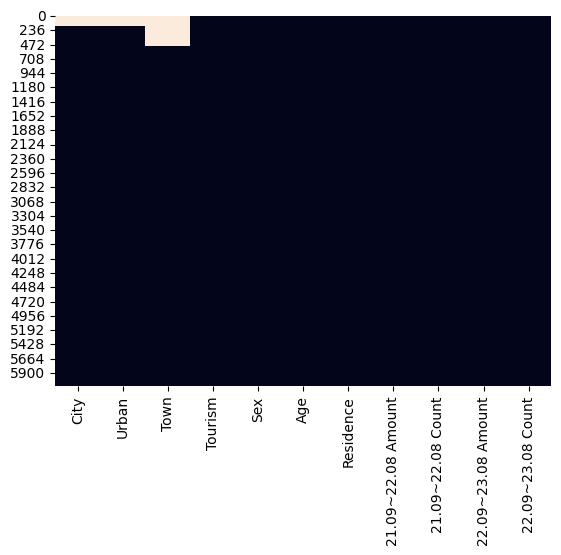

In [182]:
#시본 시각화
sns.heatmap(df.isnull(),cbar=False)

<Axes: >

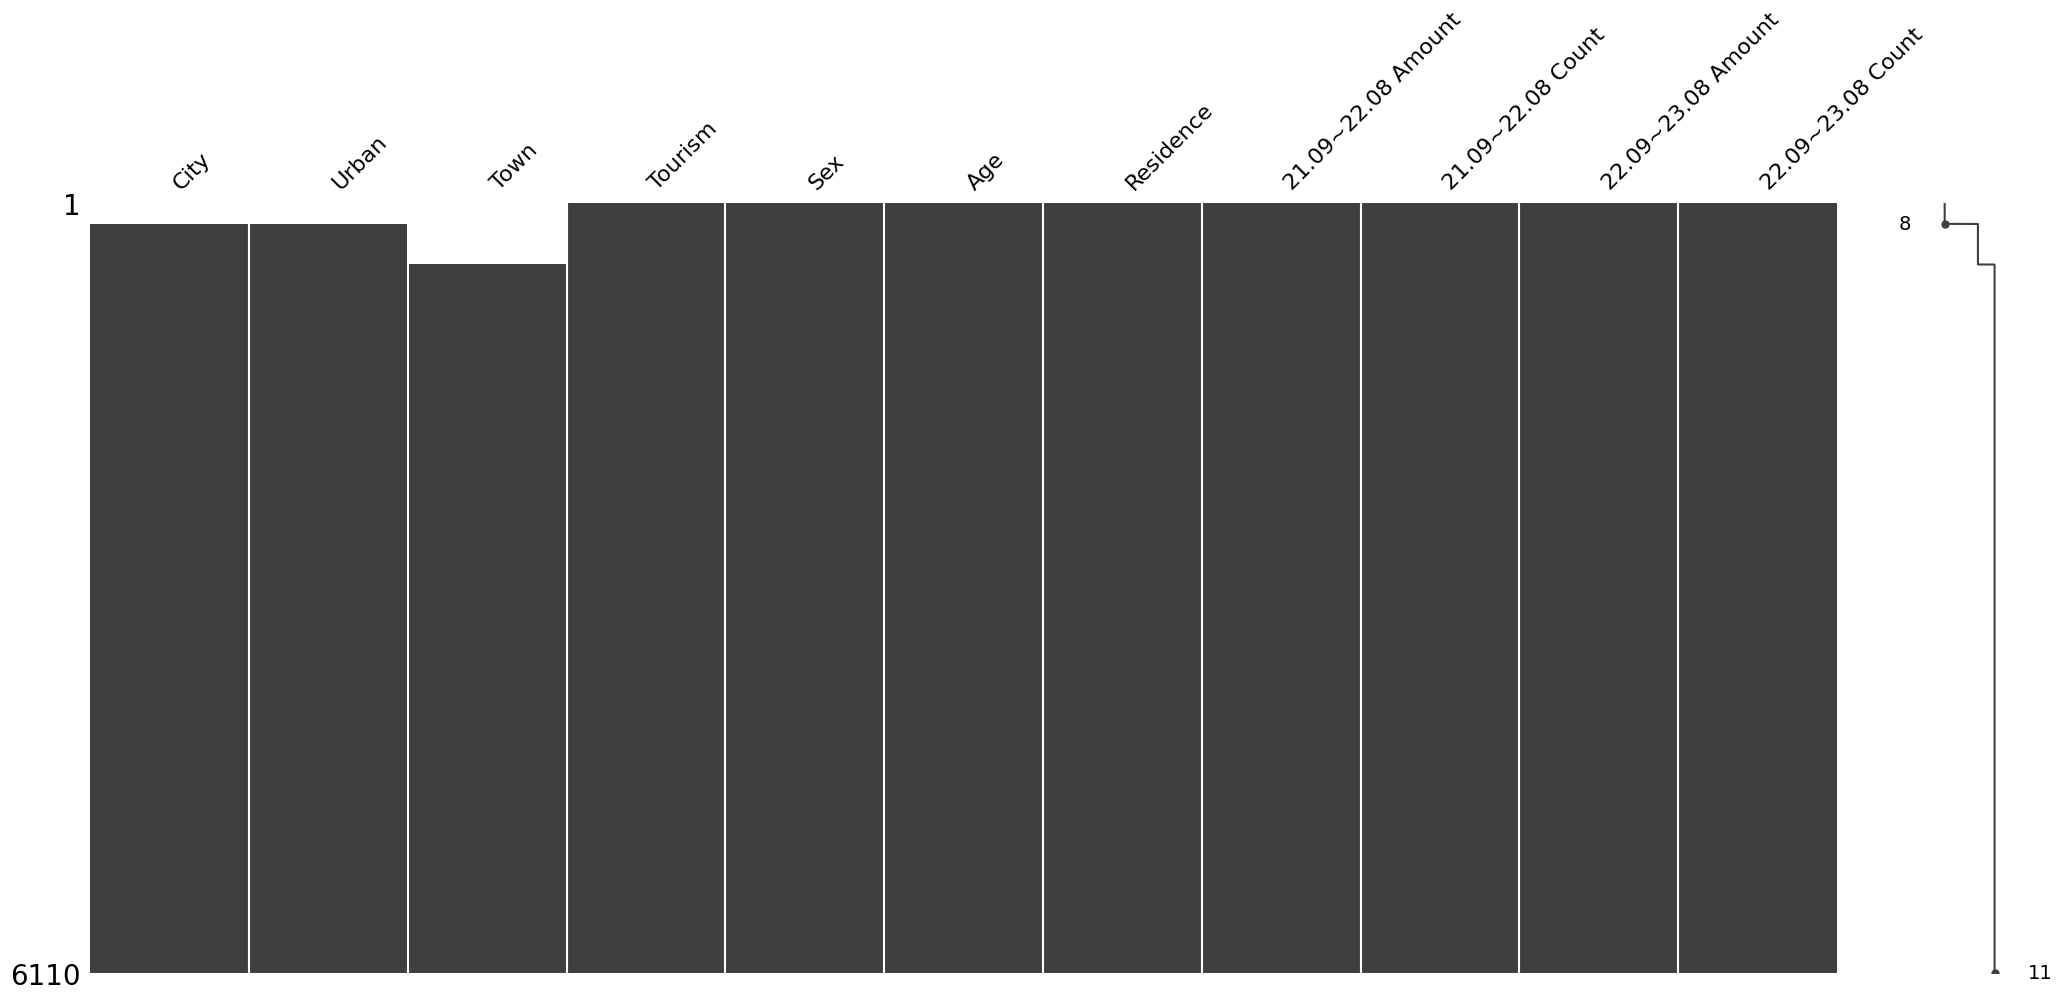

In [183]:
#매트릭스 시각화
msno.matrix(df)

<Axes: >

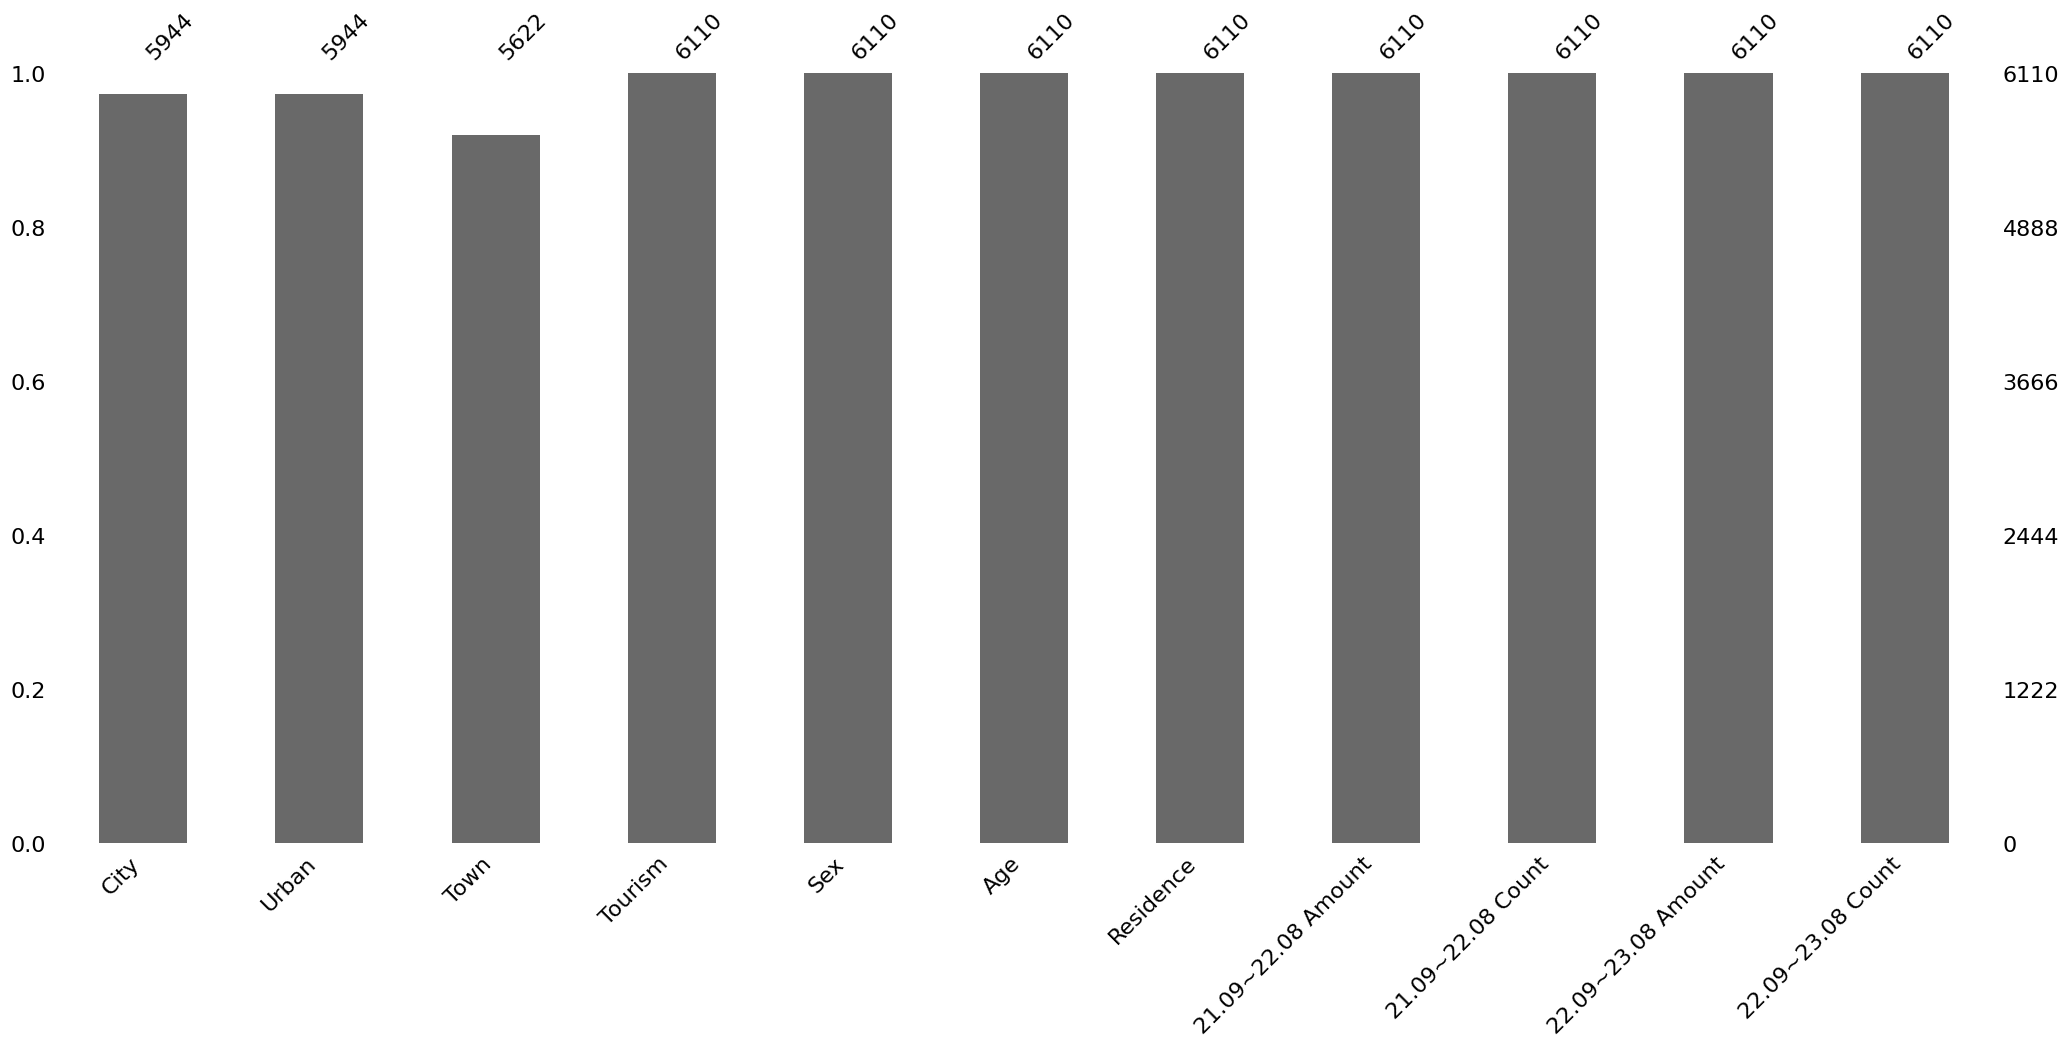

In [184]:
#바차트 시각화
msno.bar(df)

<Axes: >

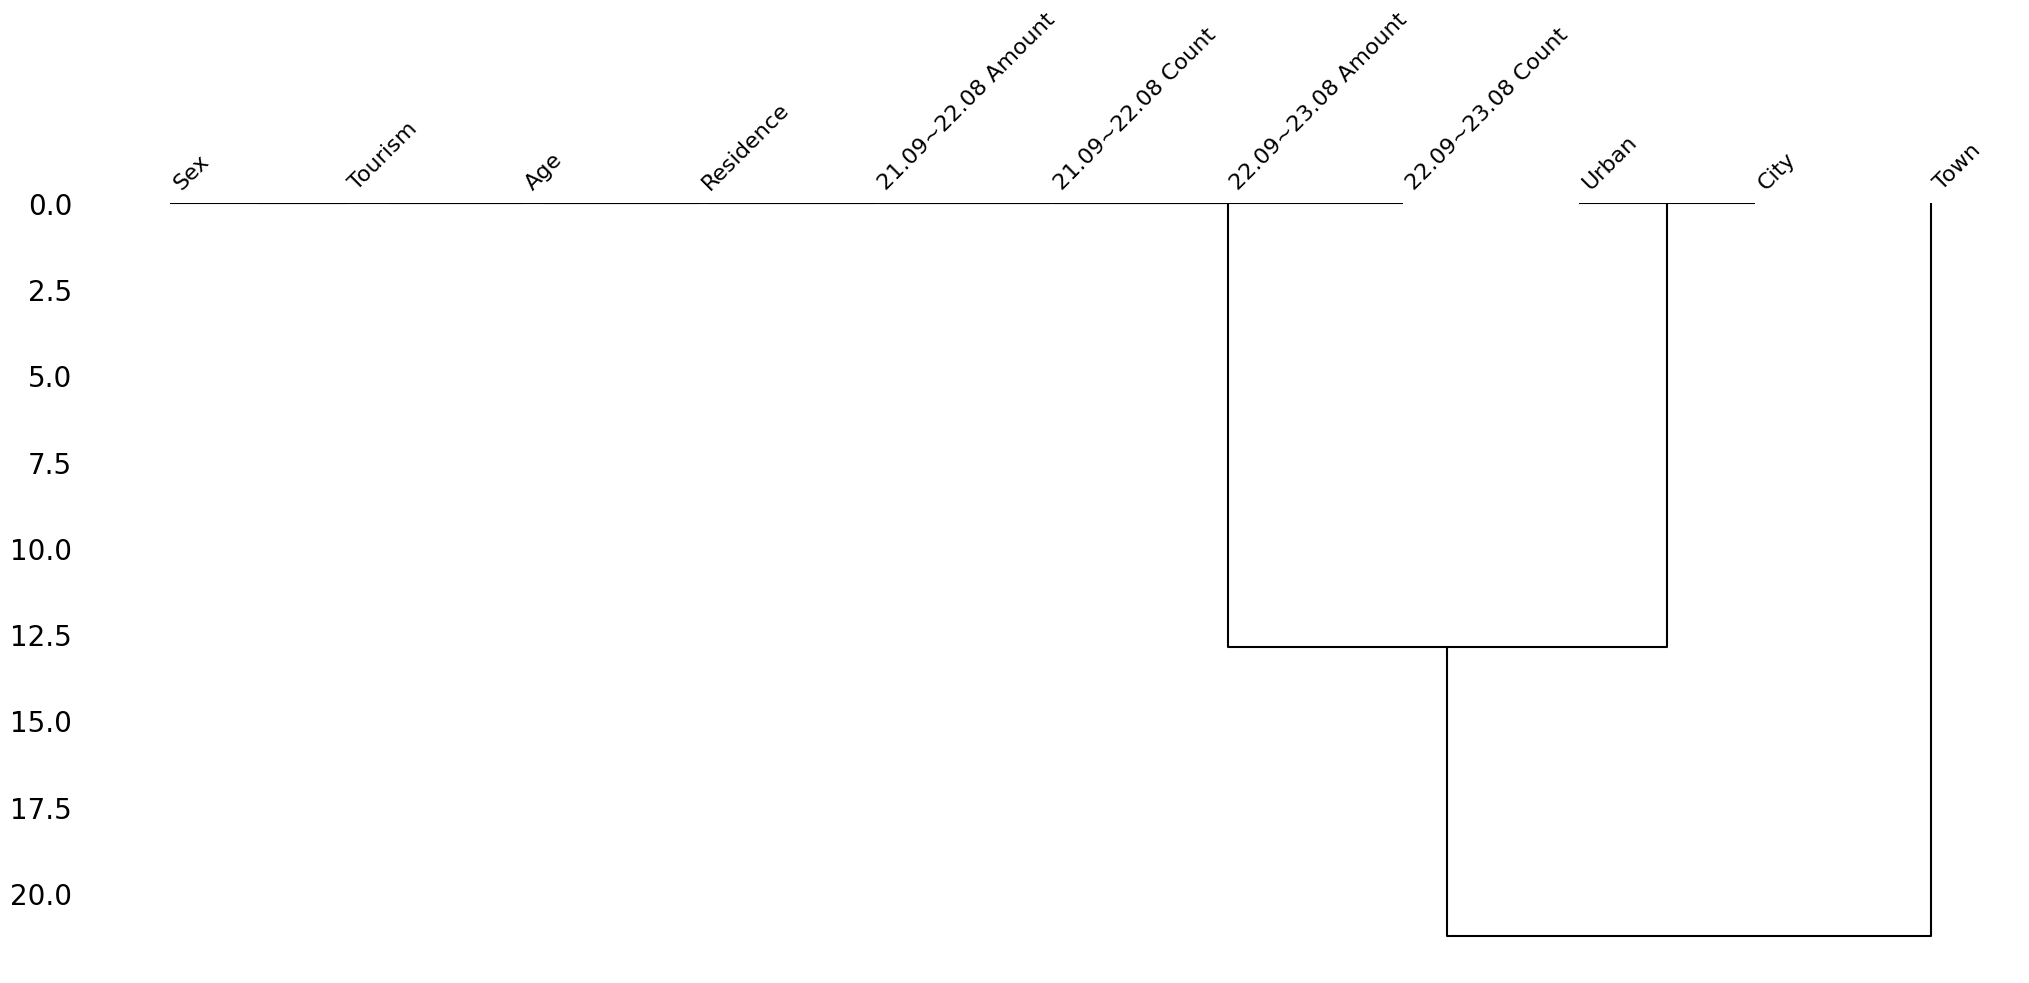

In [185]:
#덴드로그램 시각화
msno.dendrogram(df)

In [186]:
## 결측값 대체 ##

In [187]:
#범주형 개수 확인
df['City'].value_counts()

Jeju        3554
Seogwipo    2390
Name: City, dtype: int64

In [188]:
#'City'열의 결측값을 '제주시'로 대체
df['City']=df['City'].fillna('Jeju')
df

,City,Urban,Town,Tourism,Sex,Age,Residence,21.09~22.08 Amount,21.09~22.08 Count,22.09~23.08 Amount,22.09~23.08 Count
0,Jeju,NaN,NaN,Transport,M,Below 20,Jeju,19650725,479,29843198,851
1,Jeju,NaN,NaN,Transport,M,20s,Jeju,2089069468,56192,2711132135,73278
2,Jeju,NaN,NaN,Transport,M,30s,Jeju,10164021228,205373,10459317336,220460
3,Jeju,NaN,NaN,Transport,M,40s,Jeju,22623678695,367138,20797744658,368599
4,Jeju,NaN,NaN,Transport,M,50s,Jeju,24392770471,361576,20730544586,358093
...,...,...,...,...,...,...,...,...,...,...,...
6105,Seogwipo,Urban,Hyodon,Food,W,20s,Others,74464420,4275,111280350,7253
6106,Seogwipo,Urban,Hyodon,Food,W,30s,Others,124836280,6520,158482940,8834
6107,Seogwipo,Urban,Hyodon,Food,W,40s,Others,70466940,3003,96188880,4340
6108,Seogwipo,Urban,Hyodon,Food,W,50s,Others,41606210,1593,52633750,2177


In [189]:
#범주형 개수 확인
df['Urban'].value_counts()

Urban     4375
Others    1569
Name: Urban, dtype: int64

In [190]:
#'Urban'열의 결측값을 '도심'으로 대체
df['Urban']=df['Urban'].fillna('Urban')
df

,City,Urban,Town,Tourism,Sex,Age,Residence,21.09~22.08 Amount,21.09~22.08 Count,22.09~23.08 Amount,22.09~23.08 Count
0,Jeju,Urban,NaN,Transport,M,Below 20,Jeju,19650725,479,29843198,851
1,Jeju,Urban,NaN,Transport,M,20s,Jeju,2089069468,56192,2711132135,73278
2,Jeju,Urban,NaN,Transport,M,30s,Jeju,10164021228,205373,10459317336,220460
3,Jeju,Urban,NaN,Transport,M,40s,Jeju,22623678695,367138,20797744658,368599
4,Jeju,Urban,NaN,Transport,M,50s,Jeju,24392770471,361576,20730544586,358093
...,...,...,...,...,...,...,...,...,...,...,...
6105,Seogwipo,Urban,Hyodon,Food,W,20s,Others,74464420,4275,111280350,7253
6106,Seogwipo,Urban,Hyodon,Food,W,30s,Others,124836280,6520,158482940,8834
6107,Seogwipo,Urban,Hyodon,Food,W,40s,Others,70466940,3003,96188880,4340
6108,Seogwipo,Urban,Hyodon,Food,W,50s,Others,41606210,1593,52633750,2177


In [191]:
#읍/면/동 의 결측값을 제주시와 서귀포시로 나눈 후
#제주시에서 가장 많이 있는 동, '이도2동'으로 대체하였고 서귀포시에서 가장 많은 동, '남원읍'으로 대체


#'City'를 기준으로 그룹화한 후, 각 그룹 내에서 'Town' 열의 최빈값을 계산하여 modes_by_city라는 시리즈를 만듦.
modes_by_city = df.groupby('City')['Town'].agg(lambda x: x.mode().iat[0] if not x.mode().empty else None)

#각 행에 대해 'Town' 열이 결측치인지 확인하고, 만약 결측치라면 'modes_by_city'에서 해당 도시의 최빈값을 가져와서 반환
def replace_null_with_mode(row):
    if pd.isnull(row['Town']):
        return modes_by_city[row['City']]
    else:
        return row['Town']

#'Town' 열에 replace_null_with_mode 함수를 적용하여, 결측치를 해당 도시의 최빈값으로 대체하여 열을 수정
df['Town'] = df.apply(replace_null_with_mode, axis=1)
df

,City,Urban,Town,Tourism,Sex,Age,Residence,21.09~22.08 Amount,21.09~22.08 Count,22.09~23.08 Amount,22.09~23.08 Count
0,Jeju,Urban,Ido 2(i),Transport,M,Below 20,Jeju,19650725,479,29843198,851
1,Jeju,Urban,Ido 2(i),Transport,M,20s,Jeju,2089069468,56192,2711132135,73278
2,Jeju,Urban,Ido 2(i),Transport,M,30s,Jeju,10164021228,205373,10459317336,220460
3,Jeju,Urban,Ido 2(i),Transport,M,40s,Jeju,22623678695,367138,20797744658,368599
4,Jeju,Urban,Ido 2(i),Transport,M,50s,Jeju,24392770471,361576,20730544586,358093
...,...,...,...,...,...,...,...,...,...,...,...
6105,Seogwipo,Urban,Hyodon,Food,W,20s,Others,74464420,4275,111280350,7253
6106,Seogwipo,Urban,Hyodon,Food,W,30s,Others,124836280,6520,158482940,8834
6107,Seogwipo,Urban,Hyodon,Food,W,40s,Others,70466940,3003,96188880,4340
6108,Seogwipo,Urban,Hyodon,Food,W,50s,Others,41606210,1593,52633750,2177


## **4. 데이터 탐색**

In [192]:
# 데이터 바이닝 #
#(21.9~22.8)기간의 결제금액에 따라 분류
x= [0,1000000, 10000000,100000000,1000000000,10000000000,45000000000 ]
charge= pd.cut(df['21.09~22.08 Amount'],x,labels=['less 1million', 'less 10million','less 100million','less 1billion','less 10billion','less 45 billion'])
df['21.9~22.8 Rate'] =charge
df

,City,Urban,Town,Tourism,Sex,Age,Residence,21.09~22.08 Amount,21.09~22.08 Count,22.09~23.08 Amount,22.09~23.08 Count,21.9~22.8 Rate
0,Jeju,Urban,Ido 2(i),Transport,M,Below 20,Jeju,19650725,479,29843198,851,less 100million
1,Jeju,Urban,Ido 2(i),Transport,M,20s,Jeju,2089069468,56192,2711132135,73278,less 10billion
2,Jeju,Urban,Ido 2(i),Transport,M,30s,Jeju,10164021228,205373,10459317336,220460,less 45 billion
3,Jeju,Urban,Ido 2(i),Transport,M,40s,Jeju,22623678695,367138,20797744658,368599,less 45 billion
4,Jeju,Urban,Ido 2(i),Transport,M,50s,Jeju,24392770471,361576,20730544586,358093,less 45 billion
...,...,...,...,...,...,...,...,...,...,...,...,...
6105,Seogwipo,Urban,Hyodon,Food,W,20s,Others,74464420,4275,111280350,7253,less 100million
6106,Seogwipo,Urban,Hyodon,Food,W,30s,Others,124836280,6520,158482940,8834,less 1billion
6107,Seogwipo,Urban,Hyodon,Food,W,40s,Others,70466940,3003,96188880,4340,less 100million
6108,Seogwipo,Urban,Hyodon,Food,W,50s,Others,41606210,1593,52633750,2177,less 100million


In [193]:
a= df['21.9~22.8 Rate'].unique() #'21.9~22.8 Rate'열의 자료들을 추출
b= df[df['21.9~22.8 Rate'].isin(['100억-450억'])] # '21.9~22.8 Rate' 열에서 '100억-450억' 카테고리에 속하는 행만 추출
c= df[~df['21.9~22.8 Rate'].isin(['100억-450억'])] # '21.9~22.8 Rate' 열에서 '100억-450억' 카테고리에 속하지 않는 행만 추출
print(a)
print()
print(b)
print()
print(c)

['less 100million', 'less 10billion', 'less 45 billion', 'less 1billion', 'less 10million', 'less 1million']
Categories (6, object): ['less 1million' < 'less 10million' < 'less 100million' < 'less 1billion' <
                         'less 10billion' < 'less 45 billion']

Empty DataFrame
Columns: [City, Urban, Town, Tourism, Sex, Age, Residence, 21.09~22.08 Amount, 21.09~22.08 Count, 22.09~23.08 Amount, 22.09~23.08 Count, 21.9~22.8 Rate]
Index: []

          City  Urban      Town    Tourism Sex       Age Residence  \
0         Jeju  Urban  Ido 2(i)  Transport   M  Below 20      Jeju   
1         Jeju  Urban  Ido 2(i)  Transport   M       20s      Jeju   
2         Jeju  Urban  Ido 2(i)  Transport   M       30s      Jeju   
3         Jeju  Urban  Ido 2(i)  Transport   M       40s      Jeju   
4         Jeju  Urban  Ido 2(i)  Transport   M       50s      Jeju   
...        ...    ...       ...        ...  ..       ...       ...   
6105  Seogwipo  Urban    Hyodon       Food   W       20s 

In [194]:
# 21.09~22.08기간 동안 전체 평균 결제금액
total_sum = df['21.09~22.08 Amount'].sum()
total_count = len(df['21.09~22.08 Amount'])
average = total_sum // total_count if total_count > 0 else 0
print(f'(21.09~22.08) 전체평균결제금액: {average}원')

# 22.09~23.08기간 동안 전체 평균 결제금액
total_sum = df['22.09~23.08 Amount'].sum()
total_count = len(df['22.09~23.08 Amount'])
average = total_sum // total_count if total_count > 0 else 0
print(f'(22.09~23.08) 전체평균결제금액: {average}원')

(21.09~22.08) 전체평균결제금액: 558917093원
(22.09~23.08) 전체평균결제금액: 632964738원


In [195]:
#한번 결제할 때 보통 얼마씩 결제하는지 분석
#분석방법: 한 명당 기간내 전체 결제금액/결제횟수

#21.09 ~ 22.08 기간
df['21.09~22.08 OnePayment'] = df['21.09~22.08 Amount'] // df['21.09~22.08 Count']
print(df['21.09~22.08 OnePayment'])
average_one_payment = int(df['21.09~22.08 OnePayment'].mean())
print(f'한 건당 평균결제금액: {average_one_payment}원')

print()

#22.09 ~ 22.08 기간
df['22.09~23.08 OnePayment'] = df['22.09~23.08 Amount'] // df['22.09~23.08 Count']
print(df['22.09~23.08 OnePayment'])
average_one_payment = int(df['22.09~23.08 OnePayment'].mean())
print(f'한 건당 평균결제금액: {average_one_payment}원')

0       41024
1       37177
2       49490
3       61621
4       67462
        ...  
6105    17418
6106    19146
6107    23465
6108    26118
6109    28833
Name: 21.09~22.08 OnePayment, Length: 6110, dtype: int64
한 건당 평균결제금액: 54845원

0       35068
1       36997
2       47443
3       56423
4       57891
        ...  
6105    15342
6106    17940
6107    22163
6108    24177
6109    25952
Name: 22.09~23.08 OnePayment, Length: 6110, dtype: int64
한 건당 평균결제금액: 53808원


In [196]:
#제주시와 서귀포시로 나누고 성별을 나눠 각각 관광업종에 결제한 사람이 몇명인지 분석

df_1 = df.groupby(['City', 'Sex','Tourism'])  #열을 기준으로 그룹화
df_2 = df_1.size().unstack('Tourism', fill_value=0)  # 각 그룹의 크기(데이터 개수)를 계산하고 'Tourism' 열을 기준으로 그룹화된 결과를 펼쳐서 새로운 데이터프레임을 만듦.
df_2

Tourism       Culture/Reservation  Entertainment  Food  Lodging  Retail  \
City     Sex                                                              
Jeju     M                    254            221   311      237     299   
         W                    239            173   307      211     300   
Seogwipo M                    173            139   202      142     188   
         W                    166            112   201      126     194   

Tourism       Shopping  Transport  
City     Sex                       
Jeju     M         318        272  
         W         313        265  
Seogwipo M         208        167  
         W         206        166

## **5. 데이터 시각화**

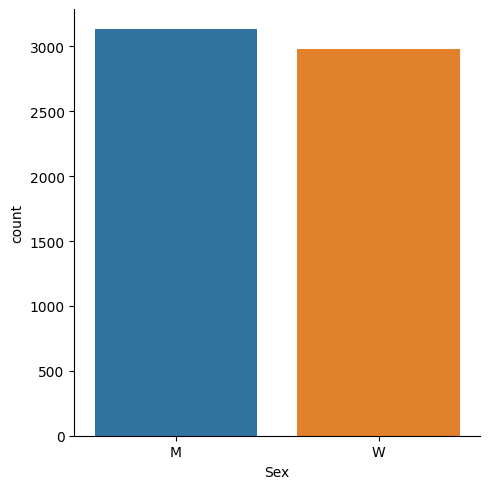

In [197]:
#성별 비교
sns.catplot(x='Sex',kind='count', data=df)

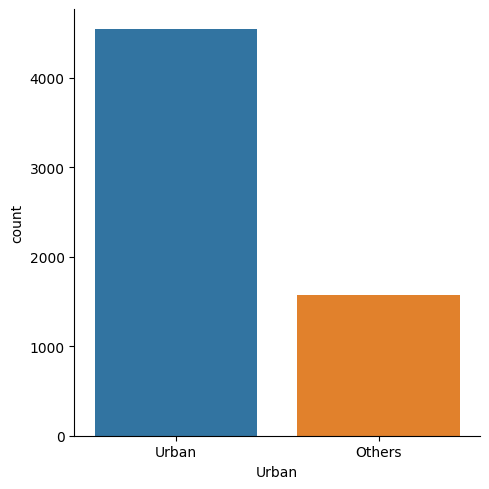

In [198]:
#도심.도심 외 비교
sns.catplot(x='Urban', kind='count', data=df)

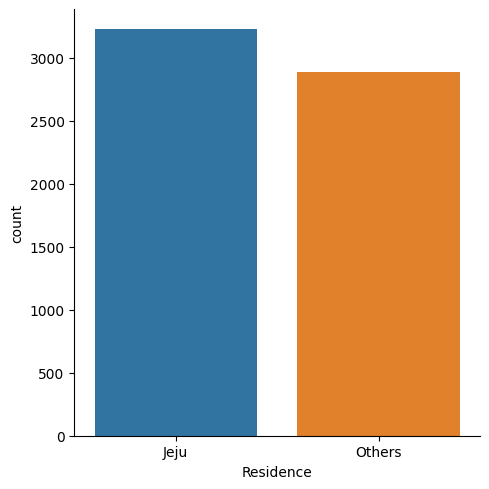

In [199]:
#제주지역과 다른지역 비교
sns.catplot(x='Residence', kind='count', data=df)

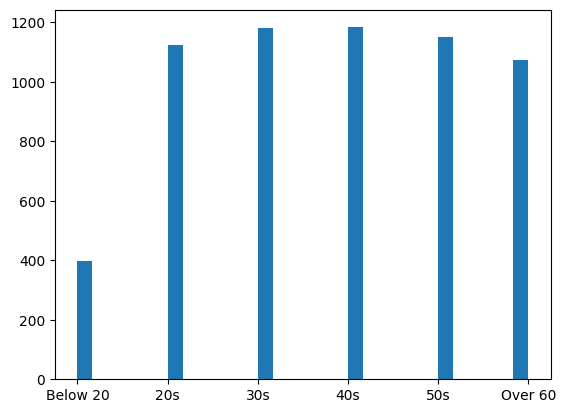

In [200]:
#나이 분포
plt.hist(df['Age'], bins=30)
plt.show()

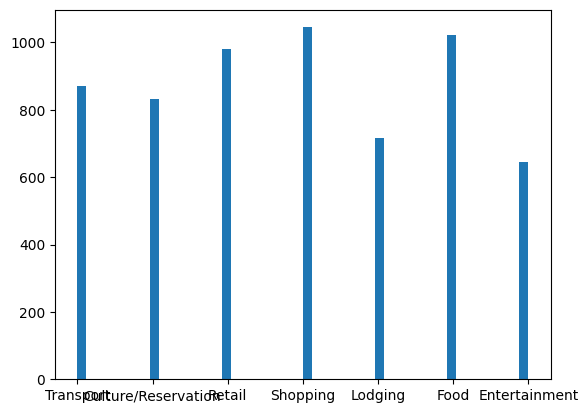

In [201]:
#관광업종 분포
plt.hist(df['Tourism'], bins=50)
plt.show()

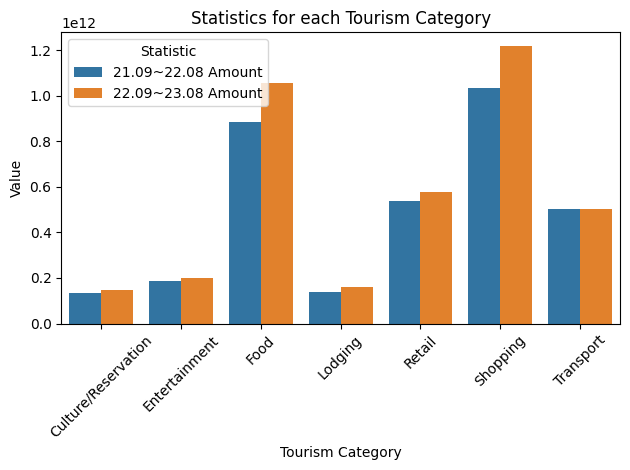

In [202]:
# 21.09~22.08기간과 22.09~23.08기간 별로 관광업종의 분야별로 막대그래프의 색상을 다르게 하여 금액 차이 비교

stats_df = df.groupby('Tourism').agg({
    '21.09~22.08 Amount': 'sum',
    '22.09~23.08 Amount': 'sum',
}).reset_index()

stats_melted = pd.melt(stats_df, id_vars='Tourism', var_name='Statistic', value_name='Value')

sns.barplot(x='Tourism', y='Value', hue='Statistic', data=stats_melted)
plt.title('Statistics for each Tourism Category')
plt.xlabel('Tourism Category')
plt.ylabel('Value')
plt.legend(title='Statistic')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

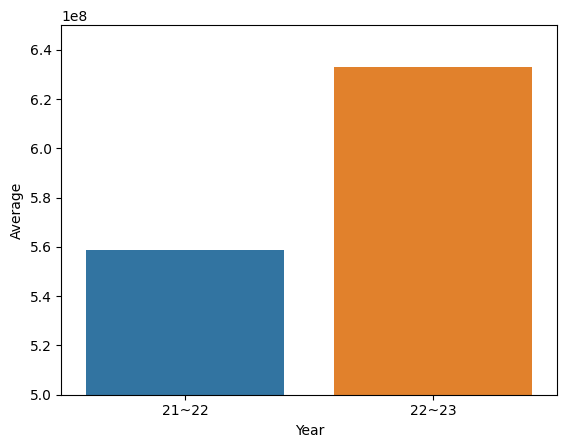

In [203]:
# 21.09~22.08기간과 22.09~23.08기간의 각 소비금액의 평균을 구해 시각화로 비교

#평균구하기
avg_2022 = df['21.09~22.08 Amount'].mean()
avg_2023 = df['22.09~23.08 Amount'].mean()

avg_df = pd.DataFrame({'Year': ['21~22', '22~23'], 'Average': [avg_2022, avg_2023]})

sns.barplot(x='Year', y='Average', data=avg_df)
plt.ylabel('Average')
plt.xlabel('Year')

plt.ylim(500000000, 650000000)

plt.show()

# **제주지역 유형별 결제 데이터 요약**
**분석**

제주지역 (21.09 ~ 23.08)기간동안의 유형별 사람들의 소비 데이터를 분석해보았다.
빅데이터 분석 파이프라인 순서대로 데이터를 분석하였다.

위에 코드와 함께 설명을 작성하였으나 추가적 설명이다.

결측치는 city, urban, town열에 위치해 있었으며 모두 제거보단 다른 데이터 값들중 가장 많이 있는 값으로 대체하였다. 이 중 Town은 제주시와 서귀포시 두개로 나눠 제주시에 해당하는 결측값은 제주시 중 가장 많은 데이터가 있는 '이도2동'과 서귀포시는 가장 많은 데이터가 있는 '남원읍'으로 대체하였다.

21.09~22.08기간동안 결제한 금액에 따라 100만원이하, 1000만원 이하, ''' 450억이하 로 분류하여 마지막 열에 분류한 데이터값을 추가하였다.

**요약**
1. 21.09~22.08기간동안의 가장 많은 소비를 한 사람의 금액은 약 420억 정도 였고 가장 작은 데이터의 금액은 약3만원이었다.
2. 21.09~22.08기간 동안 사람들이 결제한 횟수는 최소 10회이상을 하였고(10회 미만으로 결제한 사람은 없었다.) 가장 많이 한 사람은 약 16만회를 하였다.
3. 결제를 가장 많이 한 사람의 일년간 결제금액을 보면 약 380억원으로 가장 많은 소비를 한 사람이 가장 많이 결제를 하지 않았음을 알 수 있었다.
4. 21.09 ~ 22.08기간과 22.09 ~ 23.08기간의 전체평균결제금액을 비교해 보면 21 ~ 22년도 보다 22 ~ 23년도 결제금액이 증가하였음을 알수있다.
5. 21.09 ~ 22.08기간의 전체 평균적으로 한건 당 평균 결제금액은 54845원이었고 22.09 ~ 23.08기간의 전체 평균적으로 한건 당 평균 결제금액은 53808원으로 21 ~ 22년기간보다 22 ~ 23년기간이 더 적음을 알수 있었다.
6. 제주시와 서귀포시를 나눠 관광업종별로 데이터값을 비교해 본 결과 모두 쇼핑에서 가장 많이 소비했음을 알수있었다.
7. 성별을 비교해본 결과 조사한 데이터값은 남자가 여자보다 많았음을 알수있었다.
8. 결제를 한 위치는 도심이 도심이 아닌 곳 보다 많았다.
9. 소비한 사람들의 거주지를 비교해 보았을 때 제주지역사람들이 다른지역사람들보다 소비를 더 많이 하였으나 그래프상 별로 차이가 없음을 알수있었다.
10. 가장 많이 소비한 나이대는 40대였고 가장 소비가 적은 연령대는 20대 이하로 나타났다.
11. 21.09 ~ 22.08기간과 22.09 ~ 23.08기간동안 관광업종의 금액을 비교해보면 전 분야에서 21 ~ 22년도보다 22 ~ 23년도가 더 많은 소비를 했음을 알수있다.

12. 21.09 ~ 22.08기간과 22.09 ~ 23.08기간의 총 결제금액의 평균을 비교해봤을때 21 ~ 22년도보다 22 ~ 23년도의 평균금액이 더 높음을 알수있다.